In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('D:/ONTARIO TECH UNIVERSITY/Portfolio/User Behaviour Analysis/dataset.csv')
data.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


In [3]:
data.columns = data.columns.str.lower()
data.columns = ['user_id', 'age', 'gender', 'country', 'purchase_amount',
       'purchase_date', 'category']
data

,user_id,age,gender,country,purchase_amount,purchase_date,category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty
...,...,...,...,...,...,...,...
14995,14996,21.0,Male,UK,427.07,2023-08-20,Clothing
14996,14997,53.0,Other,UK,27.73,2021-07-23,Home & Kitchen
14997,14998,65.0,Female,Canada,108.57,2022-02-21,Beauty
14998,14999,34.0,Other,USA,105.57,2022-08-25,Books


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          15000 non-null  int64  
 1   age              13500 non-null  float64
 2   gender           14250 non-null  object 
 3   country          13800 non-null  object 
 4   purchase_amount  13200 non-null  float64
 5   purchase_date    13950 non-null  object 
 6   category         14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [5]:
data.isnull().sum()

user_id               0
age                1500
gender              750
country            1200
purchase_amount    1800
purchase_date      1050
category            900
dtype: int64

Age

In [6]:
age_skewness = data['age'].skew()
print(age_skewness) # since data is symmetrical replace missing with mean 

age_mean = data['age'].mean()
data['age'].fillna(age_mean , inplace=True)
data.age.isnull().sum()

0.018127064417481086


0

Country

In [7]:
data.country.value_counts()

country
France       2444
Germany      2330
Canada       2279
UK           2261
Australia    2256
USA          2230
Name: count, dtype: int64

In [8]:
countries = data.country.value_counts().index
countries

Index(['France', 'Germany', 'Canada', 'UK', 'Australia', 'USA'], dtype='object', name='country')

In [9]:
data['country'] = data['country'].apply(lambda x: x if pd.notna(x) else np.random.choice(countries))
data.country.value_counts()


country
France       2652
Germany      2529
UK           2484
Canada       2461
Australia    2451
USA          2423
Name: count, dtype: int64

Category

In [14]:
data.category.isnull().sum()

900

In [17]:
data['category'] = data['category'].fillna(data.groupby('country')['category'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))
data.category.isnull().sum()

0

Gender

In [18]:
data.gender.isnull().sum()

750

In [19]:
data.gender.value_counts()

gender
Female    4818
Other     4742
Male      4690
Name: count, dtype: int64

In [23]:
data.groupby(["category", "country"])["gender"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

category        country  
Beauty          Australia      Male
                Canada       Female
                France         Male
                Germany       Other
                UK           Female
                USA          Female
Books           Australia      Male
                Canada       Female
                France         Male
                Germany       Other
                UK             Male
                USA          Female
Clothing        Australia      Male
                Canada       Female
                France       Female
                Germany       Other
                UK             Male
                USA           Other
Electronics     Australia     Other
                Canada        Other
                France       Female
                Germany       Other
                UK             Male
                USA          Female
Home & Kitchen  Australia    Female
                Canada        Other
                France       Female
  

In [25]:
data['gender'] = data['gender'].fillna(data.groupby(["category", "country"])["gender"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [26]:
data.gender.isnull().sum()

0

Purchase Amount 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          15000 non-null  int64  
 1   age              15000 non-null  float64
 2   gender           15000 non-null  object 
 3   country          15000 non-null  object 
 4   purchase_amount  13200 non-null  float64
 5   purchase_date    13950 non-null  object 
 6   category         15000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [29]:
data.purchase_amount.isnull().sum()

1800

In [30]:
data.groupby(['country' , 'category'])['purchase_amount'].mean()

country    category      
Australia  Beauty            246.804315
           Books             256.339185
           Clothing          254.472651
           Electronics       257.496764
           Home & Kitchen    245.507199
           Sports            255.009377
Canada     Beauty            252.145030
           Books             257.223333
           Clothing          256.525020
           Electronics       240.570148
           Home & Kitchen    246.932330
           Sports            255.417078
France     Beauty            261.013583
           Books             240.964928
           Clothing          248.212430
           Electronics       252.950973
           Home & Kitchen    257.050563
           Sports            242.897825
Germany    Beauty            256.395678
           Books             266.721626
           Clothing          256.141395
           Electronics       261.396257
           Home & Kitchen    242.937953
           Sports            250.955784
UK         Bea

In [31]:
data['purchase_amount']= data['purchase_amount'].fillna(data.groupby(['country' , 'category'])['purchase_amount'].transform('mean'))
data.purchase_amount.isnull().sum()

0

Purchase Date 

In [ ]:
data['data'] = data.groupby(['country', 'category'])['data'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [33]:
data.purchase_date.isnull().sum()

0

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          15000 non-null  int64  
 1   age              15000 non-null  float64
 2   gender           15000 non-null  object 
 3   country          15000 non-null  object 
 4   purchase_amount  15000 non-null  float64
 5   purchase_date    15000 non-null  object 
 6   category         15000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [36]:
data.age = data.age.astype("int")
data['gender'] = data['gender'].astype('category')
data['category'] = data['category'].astype('category')
data['purchase_date'] = pd.to_datetime(data['purchase_date'] , errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          15000 non-null  int64         
 1   age              15000 non-null  int32         
 2   gender           15000 non-null  category      
 3   country          15000 non-null  object        
 4   purchase_amount  15000 non-null  float64       
 5   purchase_date    15000 non-null  datetime64[ns]
 6   category         15000 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 557.1+ KB


***User Demographic Analysis***

Age Distribution 

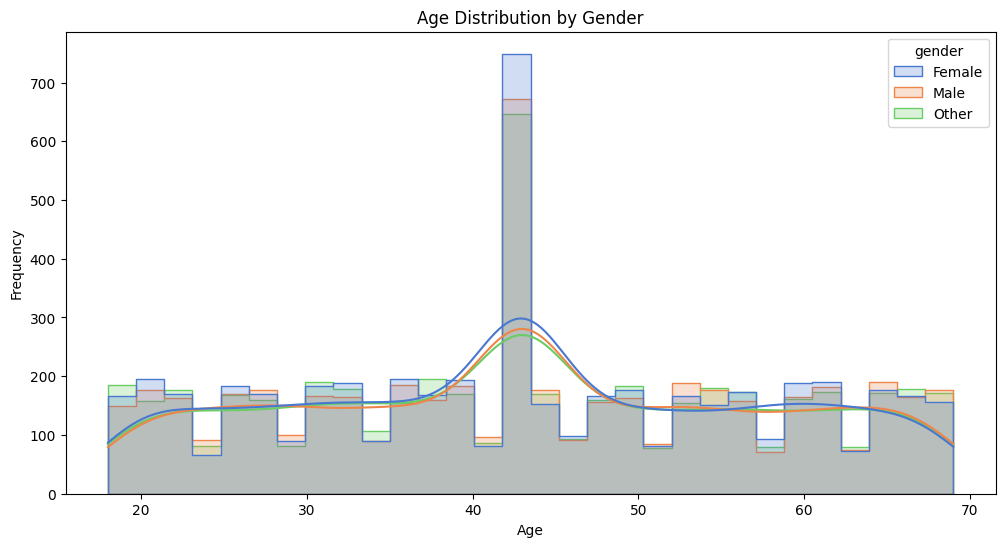

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(data=data , x='age' , hue='gender', kde=True , bins=30 , element='step' ,palette='muted' )
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

***Business Insights***  : The user base is around 40-45 years of age across genders. Targeted marketing / product recommendations /messaging can be tailored to this age group.



Age Distribution by Country

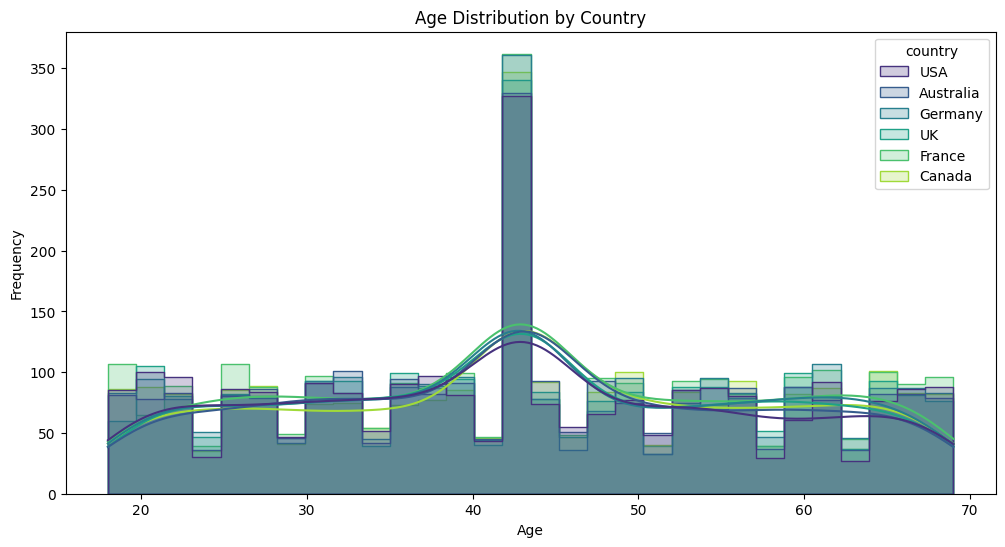

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(data=data , x='age' , hue='country', kde=True , bins=30 , element='step' ,palette='viridis' )
plt.title('Age Distribution by Country')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

***Business Insights***  : The age distribution is consistent across countries , marketing campaigns can be standardized target the age group of 40-45. However other factors as per regions should also be considered . The product feature / service is likely to succeed globally in this age group.



Gender Proportion

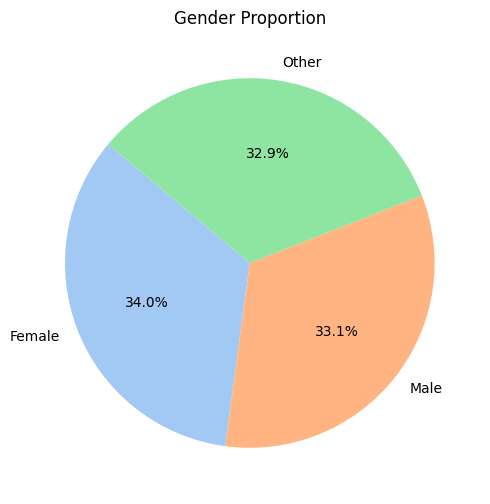

In [63]:
plt.figure(figsize=(12,6))
gender_counts = data['gender'].value_counts(dropna=False)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%' , startangle=140, colors=sns.color_palette('pastel'))
plt.title('Gender Proportion')
plt.show()

***Business Insights***  : Since the gender proportion is almost equal , the company must avoid gender-specific marketing and include gender-neutral approach.



Top 10 Country by User

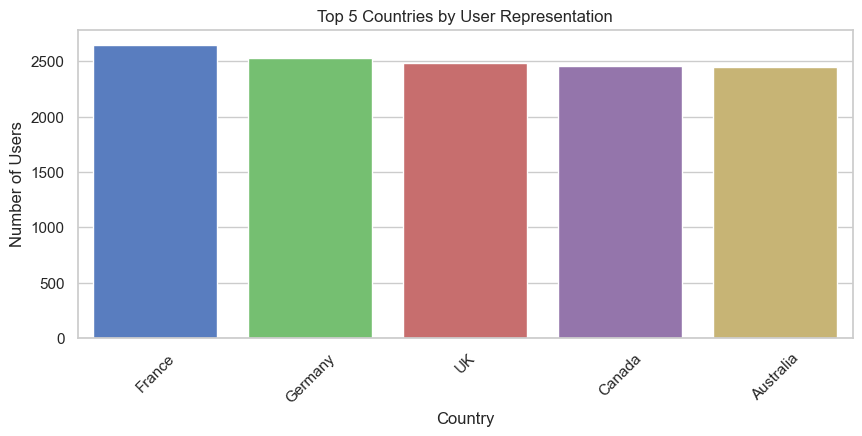

In [148]:
plt.figure(figsize=(10, 4))
country_counts = data['country'].value_counts().nlargest(5)  # Showing top 5 countries
sns.barplot(x=country_counts.index, y=country_counts.values, palette='muted6')
plt.title("Top 5 Countries by User Representation")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

***Business Insights***  : If the company wants to grow user-base further in these countries , it already has substainal user base to build on.This also helps in identifying resource allocation, engagement strategies and potential localization to maximize user satifaction in top-performing market.



***Purchase Analysis***

Purchase Distribution

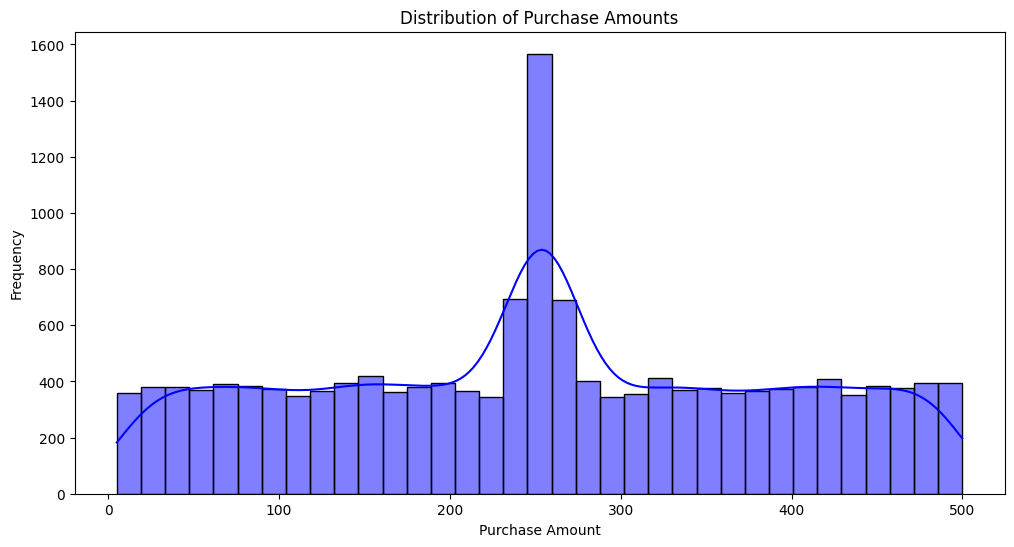

In [77]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='purchase_amount', kde=True, bins=35, color='blue')
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

***Business Insights***  : Purchase behaviour is concentrating between $200- $500. This can help the company to guide pricing , product bundling and personalized marketing strategies to align with spending patterns.
Example : Low-Spend Sgement : Encourage upselling or bundle deals to bring smaller purchases closer to $200.
Mid-Spend Segment : Focus on loyalty progrms / incentives that reward repeat purchases
High-SPend Segment: Develop premium packages / exclusive deals and add-ons.


Spend by Category

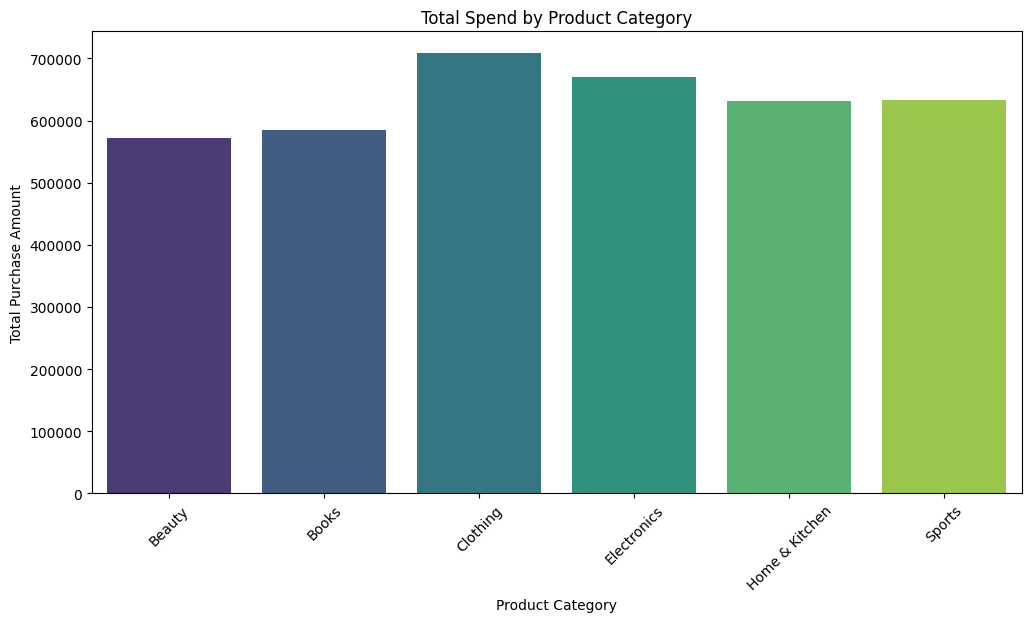

In [81]:
plt.figure(figsize=(12, 6))
category_spend = data.groupby('category')['purchase_amount'].sum()
sns.barplot(x=category_spend.index, y=category_spend.values, palette='viridis')
plt.title("Total Spend by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)
plt.show()

***Business Insights***  : Clothing and Electronics are top revenue generating categories , suggesting opportunity to focus for promotions and product launches.


***Product Category Insights***

Product Category by Age Group 

In [90]:
data['age_group'] = pd.cut(data['age'] , bins=[0,18,35,50,65,100], labels=['0-18' ,'19-35' , '36-50' ,'51-65' ,'65+'])
data.head()

,user_id,age,gender,country,purchase_amount,purchase_date,category,age_group
0,1,56,Female,USA,331.79,2021-11-21,Sports,51-65
1,2,69,Male,Australia,335.72,2022-03-05,Home & Kitchen,65+
2,3,46,Other,Germany,493.18,2021-01-24,Books,36-50
3,4,32,Male,Germany,80.97,2023-06-08,Sports,19-35
4,5,60,Female,UK,21.75,2022-04-07,Beauty,51-65


<Figure size 1300x800 with 0 Axes>

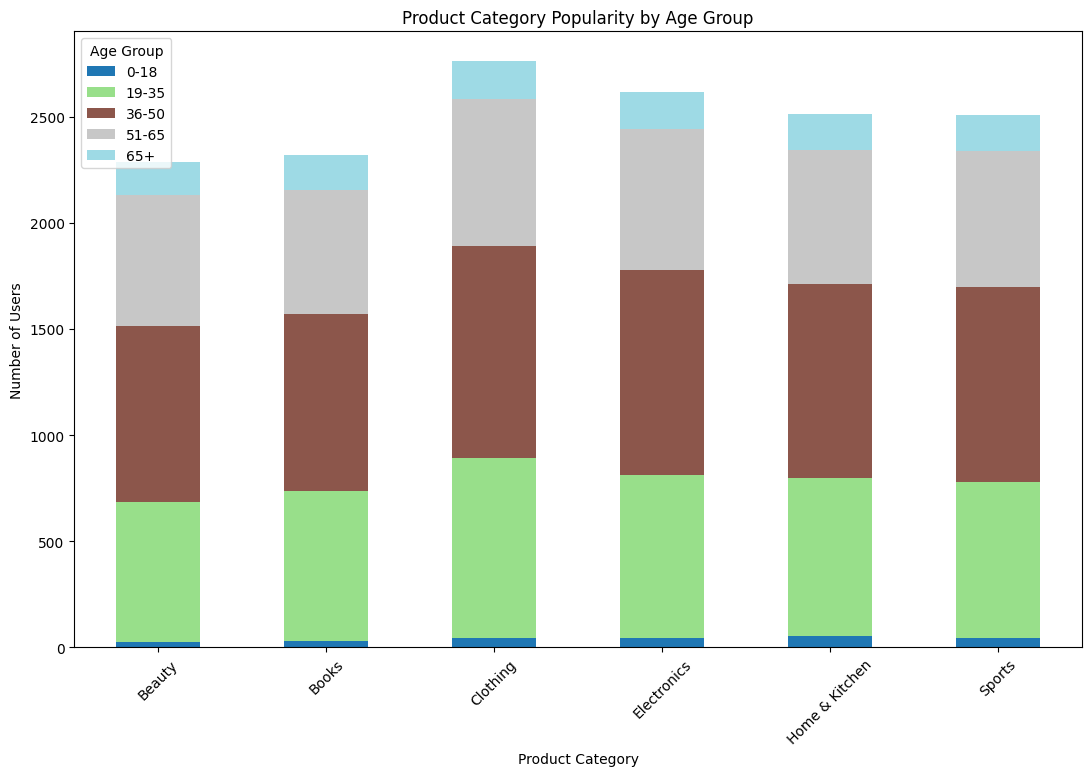

In [104]:
plt.figure(figsize=(13, 8))
category_by_age = data.groupby(['category', 'age_group']).size().unstack().fillna(0)
category_by_age.plot(kind='bar', stacked=True, figsize=(13, 8), colormap='tab20')
plt.title("Product Category Popularity by Age Group")
plt.xlabel("Product Category")
plt.ylabel("Number of Users")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.show()

***Business Insights***  : Age groups of 36-50 are the primary consumers across all categories and 19-35 coming in second.Marketing efforts should priotrize messaging , product fetures and platforms that resonate with this demographic.Product development should be tailored to these specific age groups . Example , clothing might focus on both professional and casual options . Electronics can highlight features that improve both productivity and convenience.

Product Category by Gender

<Figure size 1200x600 with 0 Axes>

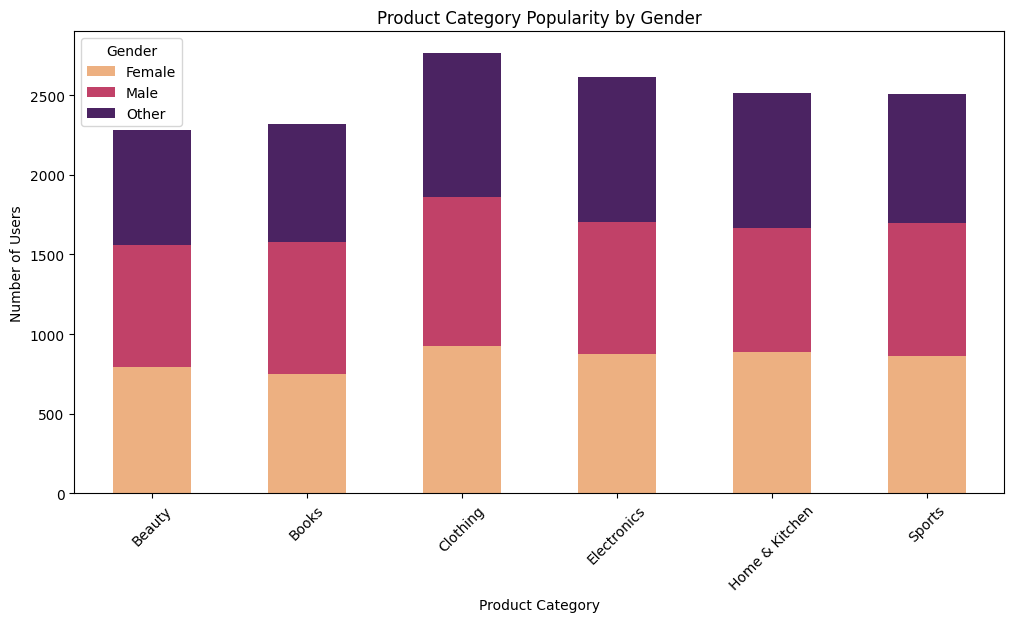

In [110]:
plt.figure(figsize=(12, 6))
category_by_gender = data.groupby(['category', 'gender']).size().unstack().fillna(0)
category_by_gender.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='flare')
plt.title("Product Category Popularity by Gender")
plt.xlabel("Product Category")
plt.ylabel("Number of Users")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

***Business Insights***  : Personalize product recommendations based on user behavior, preferences, or purchase history rather than assuming gender-based interests. For example, suggest products based on what users have shown interest without gender bias.

***User Trend Analysis***


In [ ]:
data['year'] = data['purchase_date'].dt.year
data['month'] = data['purchase_date'].dt.month
purchase_trends = data.groupby(['year', 'month'])['purchase_amount'].sum().reset_index()
data.head()

,user_id,age,gender,country,purchase_amount,purchase_date,category,age_group,month,day_of_the_week,year
0,1,56,Female,USA,331.79,2021-11-21,Sports,51-65,11,6,2021
1,2,69,Male,Australia,335.72,2022-03-05,Home & Kitchen,65+,3,5,2022
2,3,46,Other,Germany,493.18,2021-01-24,Books,36-50,1,6,2021
3,4,32,Male,Germany,80.97,2023-06-08,Sports,19-35,6,3,2023
4,5,60,Female,UK,21.75,2022-04-07,Beauty,51-65,4,3,2022


Yearly 

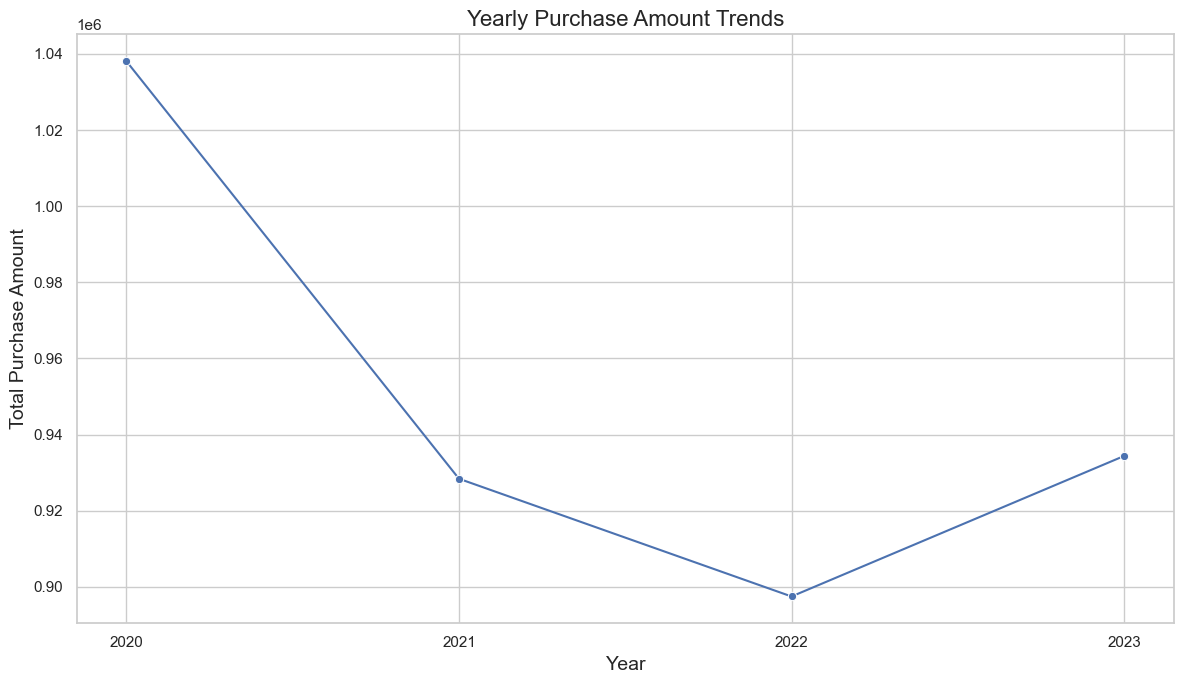

In [137]:
yearly = data.groupby('year')['purchase_amount'].sum().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=yearly, x='year', y='purchase_amount', marker='o')
plt.title('Yearly Purchase Amount Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)
plt.xticks(yearly['year'].unique())
plt.tight_layout()
plt.show()

***Business Insights***: The chart indicates a need to investigate past declines, reinforce the recent recovery, and employ strategies to maintain and grow total purchase amounts. These actions can help stabilize and enhance revenue moving forward

Monthly 

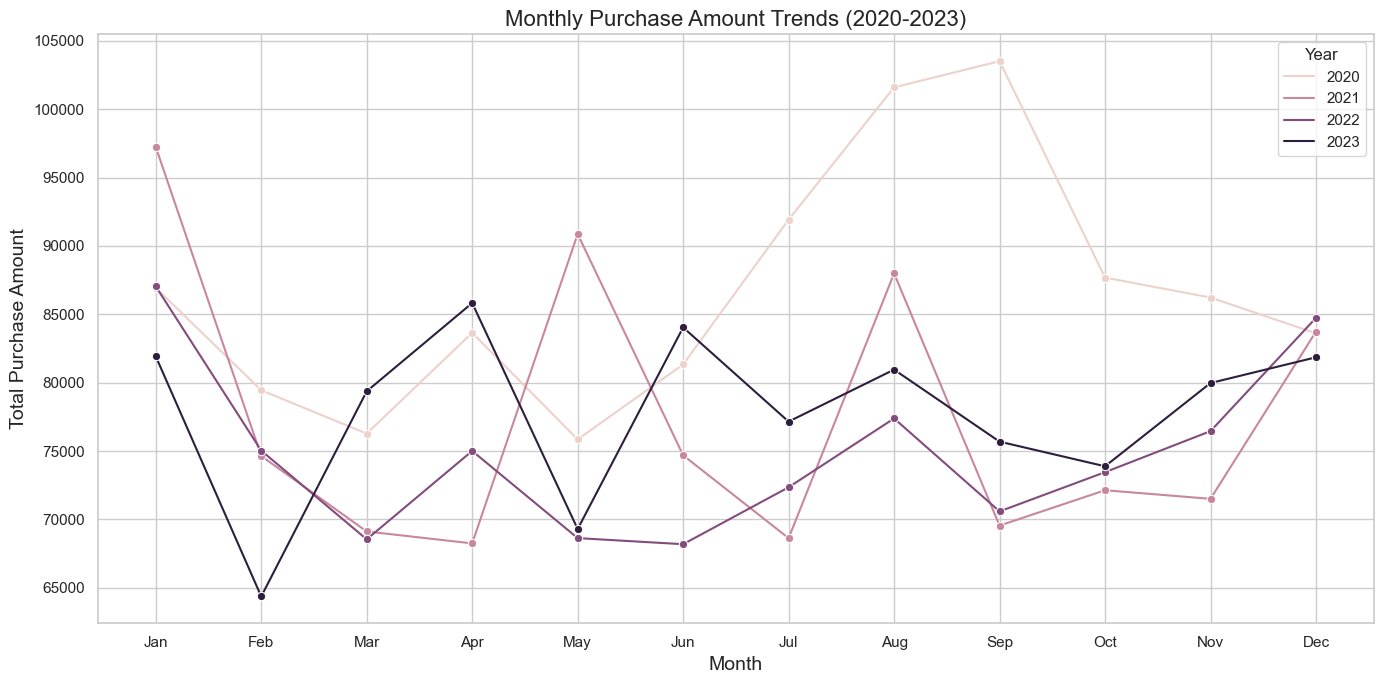

In [134]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))
sns.lineplot(data=purchase_trends, x='month', y='purchase_amount', hue='year', marker='o')
plt.title('Monthly Purchase Amount Trends (2020-2023)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()

***Business Insights***: With December consistently showing high spending, focus on holiday marketing campaigns in November and December to maximize revenue. Similarly, for other seasonal peaks (e.g., summer), launch targeted promotions to capture increased spending during those months.
For months like February and September, where spending dips, consider running promotions, discounts, or engagement campaigns to stimulate user activity. These months could be ideal for clearance sales or loyalty rewards to counteract low seasonal demand.



Churn Rate 

In [ ]:
last_purchase = data.groupby('user_id')['purchase_date'].max().reset_index()
last_year = pd.Timestamp.now() - pd.DateOffset(years=1)
churned_customers = last_purchase[last_purchase['purchase_date'] < last_year]
churned_analysis = data[data['user_id'].isin(churned_customers['user_id'])]
churned_summary = churned_analysis.groupby('user_id').agg({'purchase_amount': 'sum', 'purchase_date': 'max', 'category': 'count'}).reset_index()
churned_summary.columns = ['user_id', 'Total Purchase Amount', 'Last Purchase Date', 'Number of Purchases']

churned_summary

,user_id,Total Purchase Amount,Last Purchase Date,Number of Purchases
0,1,331.79,2021-11-21,1
1,2,335.72,2022-03-05,1
2,3,493.18,2021-01-24,1
3,4,80.97,2023-06-08,1
4,5,21.75,2022-04-07,1
...,...,...,...,...
14495,14996,427.07,2023-08-20,1
14496,14997,27.73,2021-07-23,1
14497,14998,108.57,2022-02-21,1
14498,14999,105.57,2022-08-25,1


Life time value 

In [143]:
ltv_data = data.groupby('user_id').agg({'purchase_amount': 'sum', 'purchase_date': 'count'}).reset_index()
ltv_data.columns = ['User ID', 'Total Purchase Amount', 'Number of Purchases']

ltv_data['Average Purchase Value'] = ltv_data['Total Purchase Amount'] / ltv_data['Number of Purchases']
ltv_data['Average Purchase Frequency'] = ltv_data['Number of Purchases'] / ltv_data['Number of Purchases'].count()

average_customer_lifespan = 5  # Example lifespan in years
ltv_data['LTV'] = ltv_data['Average Purchase Value'] * ltv_data['Average Purchase Frequency'] * average_customer_lifespan
ltv_data.head()

,User ID,Total Purchase Amount,Number of Purchases,Average Purchase Value,Average Purchase Frequency,LTV
0,1,331.79,1,331.79,0.000067,0.110597
1,2,335.72,1,335.72,0.000067,0.111907
2,3,493.18,1,493.18,0.000067,0.164393
3,4,80.97,1,80.97,0.000067,0.026990
4,5,21.75,1,21.75,0.000067,0.007250


***Business Insights*** :Users with higher Total Purchase Amounts and LTVs should be prioritized for loyalty programs, exclusive deals, or premium support to enhance their engagement and spending.Since purchase frequency is low, consider targeted campaigns aimed at boosting purchase frequency. For example, implement time-sensitive offers or re-engagement campaigns to remind users of new or related products